In [1]:
# Weihoa Liu
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [2]:
#Instantiating GaussianNBClassifier object
ccfd_gaussianNB = GaussianNB()

#Training the model
ccfd_gaussianNB.fit(X_train_balanced,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
gaussianNB_prediction = ccfd_gaussianNB.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_gnb = metrics.accuracy_score(y_test_balanced, gaussianNB_prediction)

#Displaying final accuracy score
"Accuracy Score: ", score_gnb

('Accuracy Score: ', 0.8840277108723927)

# ROC / AUC

Area Under Curve: 
0.7781566255746715


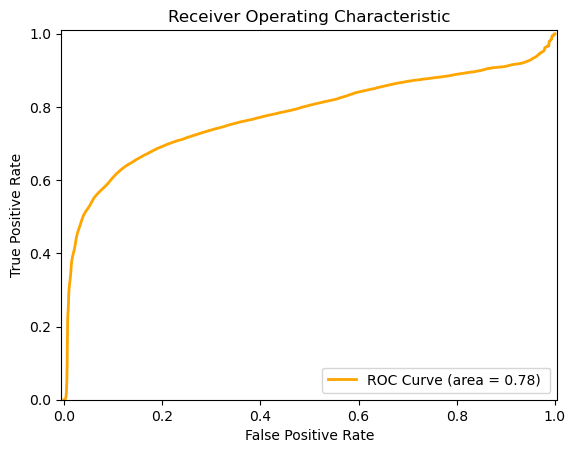

In [5]:
#Estimating the probability of Credit Card Fraud Label
gaussianNB_prediction_probability = ccfd_gaussianNB.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test_balanced, gaussianNB_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
AUC = metrics.auc(fpr, tpr)
print("Area Under Curve: ")
print(AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve (area = %0.2f) ' % AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');

# Naive Bayes Feature Importance Analysis